# **AUTHOR - KARTIK KHANDELWAL**

## Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn-darkgrid')

## Exploring Dataset

In [24]:
dataset_path = 'http://bit.ly/w-data'
data = pd.read_csv(dataset_path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
data.shape

(25, 2)

## Handling null values

In [26]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Data Visualization

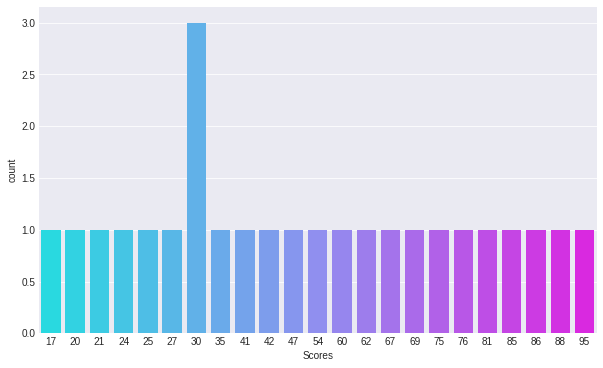

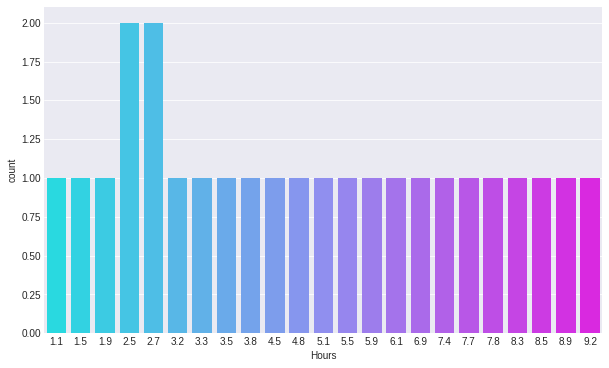

In [28]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.countplot(x=data['Scores'], palette='cool')
plt.show()
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.countplot(x=data['Hours'], palette='cool')
plt.show()

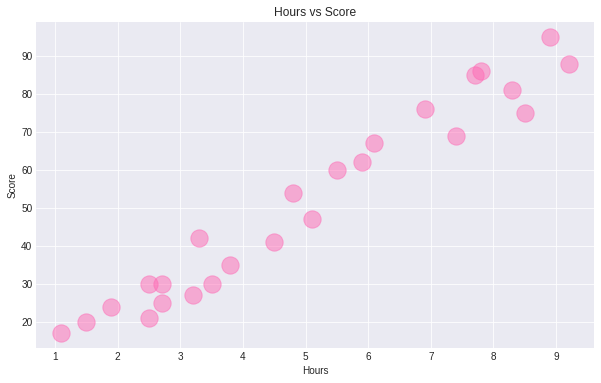

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x='Hours', y='Scores', data=data, color='hotpink', alpha=0.5, s=300,)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Hours vs Score')
plt.show()

## Expanding Dimension

In [30]:
X = data['Hours']
y = data['Scores']
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

In [31]:
X.shape, y.shape

((25, 1), (25, 1))

## Splitting into Train and Test data.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, y_train.shape

((20, 1), (20, 1))

##  Model Training

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualizing the Output

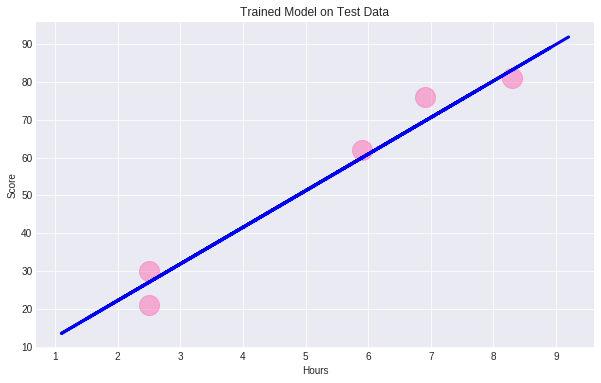

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='hotpink', alpha=0.5, s=400)
plt.plot(X_train, model.predict(X_train), color = "b", linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Trained Model on Test Data')
plt.show()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9678055545167994

## Testing on Random Data

In [38]:
hours = np.array([float(input())]).reshape(1,-1)
score = model.predict(hours)
print(f'Predicted marks will be : {score[0][0].round(2)} out of 100')

9.25
Predicted marks will be : 92.39 out of 100
